In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']  


In [3]:
shop = pd.read_excel('data/shop.xlsx',None)
shop

OrderedDict([('订单信息',          订单ID    客户ID  订单状态  优惠类型
              0       47739    5245     1     0
              1      341269    5245     0     0
              2       32690    5254     1     0
              3       45641    5254     1     0
              4       66116    5254     1     0
              5       79014    5254     1     0
              6       79058    5254     0     0
              7       79221    5254     1     0
              8       79608    5254     1     0
              9      146455    5254     1     0
              10     148275    5254     1     0
              11     149066    5254     1     1
              12     240219    5286     1     1
              13     287500    5286     1     0
              14     287502    5286     0     0
              15     290370    5286     0     0
              16     290372    5286     0     0
              17     378615    5286     0     0
              18     378618    5286     0     0
              19     378621    5

In [5]:
dingdan = shop['订单信息']
dingdan.head()

,订单ID,客户ID,订单状态,优惠类型
0,47739,5245,1,0
1,341269,5245,0,0
2,32690,5254,1,0
3,45641,5254,1,0
4,66116,5254,1,0


In [6]:
huowu = shop['货物信息']
huowu.head()

,订单ID,货物ID,货物名称,优惠额度
0,264971,103247,自然乐园水果礼盒,>15
1,264994,103247,自然乐园水果礼盒,>15
2,266829,103247,自然乐园水果礼盒,>15
3,267232,103247,自然乐园水果礼盒,>15
4,269051,103247,自然乐园水果礼盒,>15


In [7]:
guke = shop['顾客信息']
guke.head()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
0,5245,55,1430413266,1495339734,206,1
1,5254,69,1430413266,1499041945,428,13
2,5286,57,1430413266,1509936376,280,1
3,5292,184,1430413266,1510135868,643,5
4,5474,71,1430413266,1481185064,61,2


In [8]:
dingdan.info()
huowu.info()
guke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29150 entries, 0 to 29149
Data columns (total 4 columns):
订单ID    29150 non-null int64
客户ID    29150 non-null int64
订单状态    29150 non-null int64
优惠类型    29150 non-null int64
dtypes: int64(4)
memory usage: 911.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 4 columns):
订单ID    3130 non-null int64
货物ID    3130 non-null int64
货物名称    3130 non-null object
优惠额度    3130 non-null object
dtypes: int64(2), object(2)
memory usage: 97.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
客户ID                    3000 non-null int64
登陆次数                    3000 non-null int64
注册时间(距1970-1-1的秒数)      3000 non-null int64
本次购买时间(距1970-1-1的秒数)    3000 non-null int64
经验值                     3000 non-null int64
订单数                     3000 non-null object
dtypes: int64(5), object(1)
memory usage: 140.7+ KB


 ####  顾客信息表，订单数列，数据类型错误

In [13]:
type(guke.loc[0,'订单数'])

int

### 找到错误值

In [196]:
for index,row in guke.iterrows():
#     print(row['订单数'])
    if type(row['订单数']) != np.int:
        print(index,'--',row['订单数'])

46 -- yb8e507534


In [17]:
guke.loc[46,'订单数']

'yb8e507534'

In [197]:
def aaa(x):
    if type(x['订单数']) == np.int:
        return False
    else:
        return True
guke[guke.apply(aaa,axis=1)]

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
46,6243,2829,1430413266,1511178943,1172,yb8e507534


In [198]:
# 缺失值替换错误值
guke.loc[46,'订单数'] = np.nan
guke.loc[46,]

客户ID                          6243
登陆次数                          2829
注册时间(距1970-1-1的秒数)      1430413266
本次购买时间(距1970-1-1的秒数)    1511178943
经验值                           1172
订单数                            NaN
Name: 46, dtype: object

### 从其它表中数据得出本客户ID订单数据

In [23]:
guke.loc[46]

客户ID                          6243
登陆次数                          2829
注册时间(距1970-1-1的秒数)      1430413266
本次购买时间(距1970-1-1的秒数)    1511178943
经验值                           1172
订单数                            NaN
Name: 46, dtype: object

In [24]:
# 查询错误值客户ID订单数
dingdan[dingdan['客户ID'] == 6243].shape[0]

146

In [200]:
# 即错误值数为 146
guke.loc[46, '订单数'] = 146
guke.loc[46]

客户ID                          6243
登陆次数                          2829
注册时间(距1970-1-1的秒数)      1430413266
本次购买时间(距1970-1-1的秒数)    1511178943
经验值                           1172
订单数                            146
Name: 46, dtype: int64

查看异常值

In [26]:
guke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
客户ID                    3000 non-null int64
登陆次数                    3000 non-null int64
注册时间(距1970-1-1的秒数)      3000 non-null int64
本次购买时间(距1970-1-1的秒数)    3000 non-null int64
经验值                     3000 non-null int64
订单数                     3000 non-null int64
dtypes: int64(6)
memory usage: 140.7 KB


In [27]:
dingdan.describe()

,订单ID,客户ID,订单状态,优惠类型
count,29150.000000,29150.000000,29150.000000,29150.000000
mean,249006.753413,61639.974305,0.828027,0.513242
std,116588.726172,49897.424880,0.377363,0.499833
min,29787.000000,5245.000000,0.000000,0.000000
25%,167595.750000,20428.000000,1.000000,0.000000
50%,254617.500000,42854.000000,1.000000,1.000000
75%,344684.500000,120409.000000,1.000000,1.000000
max,447649.000000,169976.000000,1.000000,1.000000


In [28]:
huowu.describe()

,订单ID,货物ID
count,3130.000000,3130.000000
mean,274072.237380,102503.992652
std,10460.610208,905.268944
min,253908.000000,100891.000000
25%,266745.500000,101662.000000
50%,274352.000000,102103.000000
75%,282988.250000,103262.000000
max,292811.000000,104456.000000


In [29]:
guke.describe()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
count,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000
mean,102669.020667,157.338333,1.474146e+09,1.496260e+09,672.358667,8.494667
std,44547.168855,406.994135,1.609252e+07,1.269127e+07,1646.677601,23.129656
min,5245.000000,4.000000,1.430413e+09,1.469535e+09,7.000000,0.000000
25%,67114.250000,19.000000,1.465985e+09,1.482673e+09,51.000000,1.000000
50%,123393.000000,46.000000,1.480582e+09,1.496886e+09,146.000000,2.000000
75%,130771.250000,131.000000,1.481637e+09,1.510270e+09,593.250000,6.000000
max,169976.000000,11675.000000,1.510908e+09,1.511247e+09,34701.000000,487.000000


In [30]:
#按登录次数排序
guke.sort_values('登陆次数',ascending=False)[:10]

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
12,5661,11675,1430413266,1511224143,34701,487
801,71153,6526,1467117300,1511245124,12508,180
51,6368,5332,1430413266,1511242197,10741,136
163,20397,3778,1436344864,1511228091,17158,315
253,25304,3509,1449304809,1511243343,13673,252
218,24705,3264,1448253287,1511218542,12626,158
166,20600,3107,1436432061,1511102956,15398,209
46,6243,2829,1430413266,1511178943,1172,146
7,5552,2699,1430413266,1511245956,12673,164
413,33650,2635,1456995096,1511161356,5139,54


In [201]:
# 按登录次数排序
guke.sort_values('订单数',ascending=True)[:10]

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
2387,132571,13,1481947876,1481984446,26,0
2379,132497,163,1481907121,1507163000,428,0
2382,132518,17,1481938527,1482150970,52,0
2385,132543,30,1481942140,1503463783,86,0
2386,132561,97,1481946023,1504665228,346,0
1915,127494,37,1481209009,1482508443,132,0
2389,132637,32,1481956776,1482241685,33,0
2395,132682,18,1481964676,1482304250,26,0
2397,132691,33,1481966439,1482156010,77,0
2398,132697,36,1481967307,1482120951,46,0


### 查找订单数为0的，查看是否有异常

In [32]:
guke[guke['订单数'] == 0]

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
8,5560,39,1430413266,1481811865,27,0
230,25009,41,1448896799,1481880805,48,0
366,30693,46,1454416517,1494487927,148,0
546,43032,236,1460729071,1493391217,1119,0
657,50661,90,1462530683,1510145689,184,0
718,54287,13,1463730772,1482066960,28,0
738,64919,335,1464790747,1497573541,1522,0
750,67193,11,1465904747,1486274662,85,0
837,73953,34,1467270740,1491751840,52,0
935,108322,10,1470836655,1489377328,53,0


#### 订单数为0的基本无异常

In [261]:
writer = pd.ExcelWriter('data_new/shop2.xlsx')

dingdan.to_excel(
    writer, # 写入数据
    '订单信息', # 工作表标签
    index=False # 不存入行索引
)

huowu.to_excel(
    writer, # 写入数据
    '货物信息', # 工作表标签
    index=False # 不存入行索引
)

guke.to_excel(
    writer, # 写入数据
    '顾客信息', # 工作表标签
    index=False # 不存入行索引
)

writer.save()

   ------------------------------------------    

### 分析订单
#### 分析货物的优惠额度
    指标：不同优惠额度的订单数量

In [262]:
huowu.head()

,订单ID,货物ID,货物名称,优惠额度
0,264971,103247,自然乐园水果礼盒,>15
1,264994,103247,自然乐园水果礼盒,>15
2,266829,103247,自然乐园水果礼盒,>15
3,267232,103247,自然乐园水果礼盒,>15
4,269051,103247,自然乐园水果礼盒,>15


In [263]:
# _ = huowu.groupby('优惠额度').size().sort_values(ascending=False)
_ = huowu['优惠额度'].value_counts()
_

0        1439
2-5       596
0-2       584
5-10      310
>15       163
10-15      38
Name: 优惠额度, dtype: int64

#### 可视化

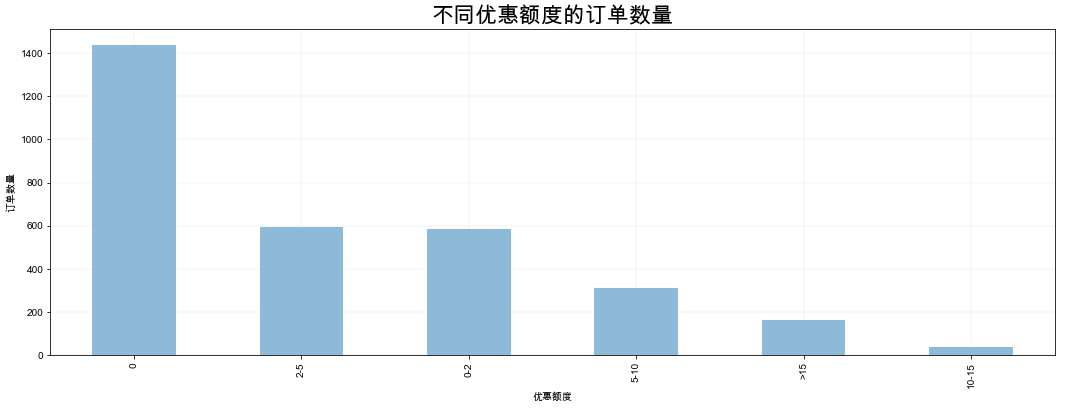

In [264]:
_.plot.bar(figsize=(18, 6), alpha=0.5)

plt.title('不同优惠额度的订单数量', fontsize=22)
plt.xlabel('优惠额度')
plt.ylabel('订单数量')
plt.grid(linewidth=0.3, alpha=0.5)

In [265]:
huowu.tail()

,订单ID,货物ID,货物名称,优惠额度
3125,282903,103376,500元充值卡,0
3126,283994,103376,500元充值卡,0
3127,284171,103376,500元充值卡,0
3128,256095,103376,500元充值卡,0
3129,256499,103376,500元充值卡,0


#### 指标：原价商品前十排名

In [266]:
huowu[huowu['优惠额度'] == '0']  # 原价商品
huowu[huowu['优惠额度'] == '0'].groupby('货物名称').size().sort_values(ascending=False)  # 销量
huowu[huowu['优惠额度'] == '0'].groupby('货物名称').size().sort_values(ascending=False)[:10]  # 前10

货物名称
海南香蕉           60
安慕希希腊酸奶（原味）    57
冷冻鲜肉           51
新希望酸奶初心        50
静宁小苹果          48
金堂脐橙           42
冰糖橙            40
土飞鸡            37
福临门丝苗米         36
好迪             35
dtype: int64

In [267]:
# 调整样式
_ = huowu[huowu['优惠额度'] == '0'].groupby('货物名称').size().sort_values(ascending=False)[:10] \
.reset_index().set_index('货物名称').rename(columns={0: '销量'})
_.index.name = ''
_.columns.name = '货物名称'
_

货物名称,销量
,
海南香蕉,60
安慕希希腊酸奶（原味）,57
冷冻鲜肉,51
新希望酸奶初心,50
静宁小苹果,48
金堂脐橙,42
冰糖橙,40
土飞鸡,37
福临门丝苗米,36


#### 可视化

Text(0, 0.5, '销量')

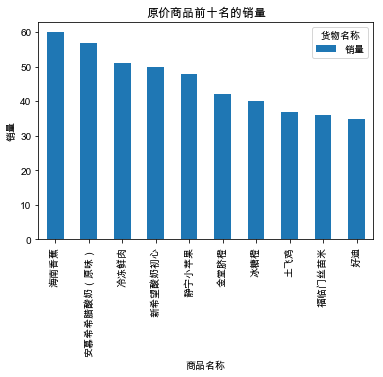

In [268]:
_.plot.bar()
plt.title('原价商品前十名的销量')
plt.xlabel('商品名称')
plt.ylabel('销量')

指标：优惠商品销量前十名

In [269]:
_ = huowu[huowu['优惠额度'] != '0'].groupby('货物名称').size().sort_values(ascending=False)[:10] \
.reset_index().set_index('货物名称').rename(columns={0: '销量'})
_.index.name = ''
_.columns.name = '货物名称'
_

货物名称,销量
,
蒲江耙耙柑,118
蒲江不知火丑柑【原产地直供】,61
藕,54
青椒,41
小葱,39
泰国龙眼【进口商品】800g,39
西红柿,38
云南青枣,37
小白菜,34


#### 可视化

Text(0, 0.5, '销量')

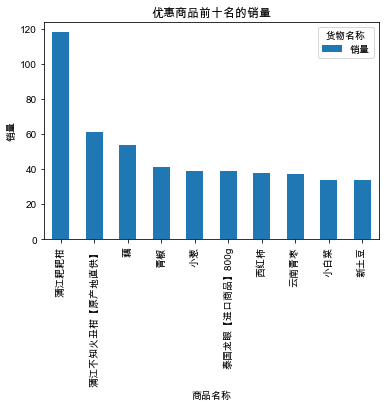

In [270]:
_.plot.bar()
plt.title('优惠商品前十名的销量')
plt.xlabel('商品名称')
plt.ylabel('销量')

结论：对销量前十或者靠后的商品，可以根据销量情况增加上货频率或撤柜频率

————————————————————————————————————————————————————




### “无价值客户”指标量化定义

什么是无价值客户？ 设定指标：在已完成订单中，优惠商品的订单比例大于等于75%时，定义客户为无价值客户

#### 分离正常客户和无价值客户

In [271]:
dingdan.head()

,订单ID,客户ID,订单状态,优惠类型
0,47739,5245,1,0
1,341269,5245,0,0
2,32690,5254,1,0
3,45641,5254,1,0
4,66116,5254,1,0


查看未完成和已完成订单的数量

In [272]:
dingdan.groupby('订单状态').size()

订单状态
0     5013
1    24137
dtype: int64

In [273]:
dingdan2 = dingdan[dingdan['订单状态'] == 1]
dingdan2.head()

,订单ID,客户ID,订单状态,优惠类型
0,47739,5245,1,0
2,32690,5254,1,0
3,45641,5254,1,0
4,66116,5254,1,0
5,79014,5254,1,0


In [274]:
dingdan2.shape

(24137, 4)

#### 客户ID对应的正常和优惠订单的数量



In [275]:
dingdan2
# pd.crosstab(dingdan2['客户ID'], dingdan2['优惠类型']) 

_ = dingdan2.groupby(['客户ID','优惠类型']).size().unstack().fillna(0).astype(np.int)  
_.head()


优惠类型,0,1
客户ID,,
5245,1,0
5254,8,1
5286,1,1
5292,4,2
5474,1,1


#### 计算优惠订单大于等于75%的数据

    0/(8+1)  # 正常订单占所有订单的比例
    1/(8+1)  # 优惠订单占所有订单的比例
    
最终目的：获取无价值客户的客户ID

In [276]:
_.sum(axis=1)  # 每个客户的总订单数

_[1] / _.sum(axis=1)  # 优惠订单占所有订单的比例

s = _[(_[1] / _.sum(axis=1)) >= 0.75].index.values  # 所有无价值客户的客户ID
s

array([  5560,   5580,   5723, ..., 169815, 169832, 169976], dtype=int64)

In [277]:
s.shape

(1669,)

In [278]:
 # 先将所有用户改为有价值用户
_['客户类别'] = 1 
_.head()

优惠类型,0,1,客户类别
客户ID,,,
5245,1,0,1
5254,8,1,1
5286,1,1,1
5292,4,2,1
5474,1,1,1


In [279]:
# 再将无价值客户改为0
_.loc[s, '客户类别'] = 0
_.head(10)

优惠类型,0,1,客户类别
客户ID,,,
5245,1,0,1
5254,8,1,1
5286,1,1,1
5292,4,2,1
5474,1,1,1
5544,75,16,1
5547,5,4,1
5552,55,96,1
5560,0,1,0


#### 把 _ 的客户类别列插入顾客信息单元表中



In [280]:
_['客户类别'].head(10)

客户ID
5245    1
5254    1
5286    1
5292    1
5474    1
5544    1
5547    1
5552    1
5560    0
5580    0
Name: 客户类别, dtype: int64

In [281]:
guke.head()

,客户ID,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
0,5245,55,1430413266,1495339734,206,1
1,5254,69,1430413266,1499041945,428,13
2,5286,57,1430413266,1509936376,280,1
3,5292,184,1430413266,1510135868,643,5
4,5474,71,1430413266,1481185064,61,2


In [282]:
guke2 = guke.set_index('客户ID')
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
客户ID,,,,,
5245,55,1430413266,1495339734,206,1
5254,69,1430413266,1499041945,428,13
5286,57,1430413266,1509936376,280,1
5292,184,1430413266,1510135868,643,5
5474,71,1430413266,1481185064,61,2


In [283]:
guke2['客户类别'] = _['客户类别']
guke2.head(10)

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别
客户ID,,,,,,
5245,55,1430413266,1495339734,206,1,1
5254,69,1430413266,1499041945,428,13,1
5286,57,1430413266,1509936376,280,1,1
5292,184,1430413266,1510135868,643,5,1
5474,71,1430413266,1481185064,61,2,1
5544,520,1430413266,1511065463,5033,103,1
5547,30,1430413266,1510577047,477,8,1
5552,2699,1430413266,1511245956,12673,164,1
5560,39,1430413266,1481811865,27,0,0


In [284]:
_.shape, guke2.shape

((3000, 3), (3000, 6))

In [285]:
_.groupby('客户类别').size()

客户类别
0    1669
1    1331
dtype: int64

In [286]:
guke2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 5245 to 169976
Data columns (total 6 columns):
登陆次数                    3000 non-null int64
注册时间(距1970-1-1的秒数)      3000 non-null int64
本次购买时间(距1970-1-1的秒数)    3000 non-null int64
经验值                     3000 non-null int64
订单数                     3000 non-null int64
客户类别                    3000 non-null int64
dtypes: int64(6)
memory usage: 164.1 KB


### 正常客户和无价值客户分离完成



---

## 客户特征分析

分析正常客户和无价值客户的特征和行为差异

    举例：正常客户的平均登陆次数多少，无价值客户的平均登陆次数多少

In [287]:
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别
客户ID,,,,,,
5245,55,1430413266,1495339734,206,1,1
5254,69,1430413266,1499041945,428,13,1
5286,57,1430413266,1509936376,280,1,1
5292,184,1430413266,1510135868,643,5,1
5474,71,1430413266,1481185064,61,2,1


#### 指标：正常客户和无价值客户比例


In [288]:
_ = guke2.groupby('客户类别').size().rename({0: '无价值客户', 1: '正常客户'})
_

客户类别
无价值客户    1669
正常客户     1331
dtype: int64

#### 可视化

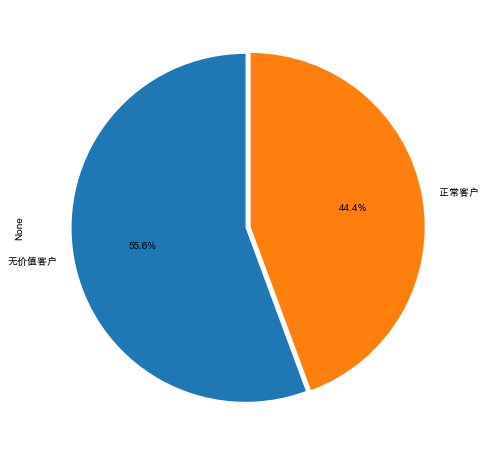

In [289]:
_.plot.pie(figsize=(8, 8), labels=_.index, explode=(0, 0.03), autopct='%1.1f%%', startangle=90)

结论：无价值客户的数量略大于正常客户

### 比较各列数据在不同客户类别下的差异

In [290]:
guke_mean = guke2.groupby('客户类别').mean().rename(index={0: '无价值客户', 1: '正常客户'})
guke_mean

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数
客户类别,,,,,
无价值客户,77.547633,1.479904e+09,1.491441e+09,259.021570,2.980827
正常客户,257.391435,1.466927e+09,1.502303e+09,1190.660406,15.408715


#### 年平均登陆次数差异


In [291]:
guke_mean['登陆次数']

客户类别
无价值客户     77.547633
正常客户     257.391435
Name: 登陆次数, dtype: float64

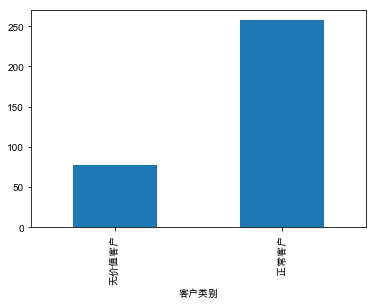

In [292]:
guke_mean['登陆次数'].plot.bar()

结论：正常客户的年平均登陆次数要远大于无价值客户

#### 客户会员经验平均值差异

In [293]:
guke_mean['经验值']

客户类别
无价值客户     259.021570
正常客户     1190.660406
Name: 经验值, dtype: float64

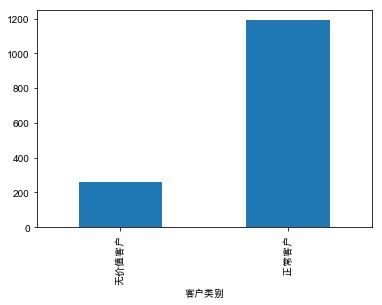

In [294]:
guke_mean['经验值'].plot.bar()

结论：正常客户经验值要大于无价值客户

#### 客户平均订单数差异

In [295]:
guke_mean['订单数']

客户类别
无价值客户     2.980827
正常客户     15.408715
Name: 订单数, dtype: float64

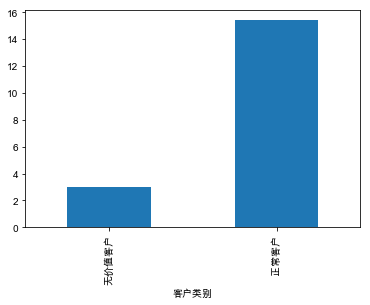

In [296]:
guke_mean['订单数'].plot.bar()

结论：正常客户订单数远大于无价值客户

#### 注册时间和购买时间差异

增加1列，`间隔天数`,(注册时间到本次购买时间的间隔天数）

无价值用户和正常用户的平均间隔天数差异

In [297]:
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别
客户ID,,,,,,
5245,55,1430413266,1495339734,206,1,1
5254,69,1430413266,1499041945,428,13,1
5286,57,1430413266,1509936376,280,1,1
5292,184,1430413266,1510135868,643,5,1
5474,71,1430413266,1481185064,61,2,1


In [298]:
24 * 60 * 60

86400

In [299]:
guke2['间隔天数'] = (guke2['本次购买时间(距1970-1-1的秒数)'] - guke2['注册时间(距1970-1-1的秒数)']) / 86400
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别,间隔天数
客户ID,,,,,,,
5245,55,1430413266,1495339734,206,1,1,751.463750
5254,69,1430413266,1499041945,428,13,1,794.313414
5286,57,1430413266,1509936376,280,1,1,920.406366
5292,184,1430413266,1510135868,643,5,1,922.715301
5474,71,1430413266,1481185064,61,2,1,587.636551


In [300]:
guke2['间隔天数'].describe()  # 查看间隔天数列的整体指标

count    3000.000000
mean      255.942592
std       254.960800
min         0.000000
25%        16.877584
50%       199.825880
75%       402.055605
max       935.574028
Name: 间隔天数, dtype: float64

In [301]:
_ = guke2.groupby('客户类别')['间隔天数'].median().rename(index={0: '无价值用户', 1: '正常用户'})
_

客户类别
无价值用户     38.766852
正常用户     372.295220
Name: 间隔天数, dtype: float64

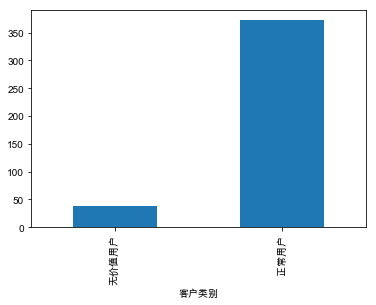

In [302]:
_.plot.bar()

结论：无价值客户购买和注册时间间隔显著小于正常客户

#### 计算无价值客户和正常客户注册当天购物的比例

In [303]:
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别,间隔天数
客户ID,,,,,,,
5245,55,1430413266,1495339734,206,1,1,751.463750
5254,69,1430413266,1499041945,428,13,1,794.313414
5286,57,1430413266,1509936376,280,1,1,920.406366
5292,184,1430413266,1510135868,643,5,1,922.715301
5474,71,1430413266,1481185064,61,2,1,587.636551


In [304]:
# 注册当天就购物的客户
_ = guke2[guke2['间隔天数'] <= 1]  # 注册当天就购物的客户
_.index

Int64Index([107809, 107819, 108768, 109259, 109410, 109654, 109658, 110122,
            110172, 110223,
            ...
            158720, 158730, 162931, 163525, 168745, 168748, 168751, 168948,
            169269, 169691],
           dtype='int64', name='客户ID', length=316)

增加新列：是否当天购买

In [305]:
guke2['是否当天购买'] = 0
guke2.loc[_.index, '是否当天购买'] = 1
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别,间隔天数,是否当天购买
客户ID,,,,,,,,
5245,55,1430413266,1495339734,206,1,1,751.463750,0
5254,69,1430413266,1499041945,428,13,1,794.313414,0
5286,57,1430413266,1509936376,280,1,1,920.406366,0
5292,184,1430413266,1510135868,643,5,1,922.715301,0
5474,71,1430413266,1481185064,61,2,1,587.636551,0


In [306]:
guke2.groupby('是否当天购买').size()

是否当天购买
0    2684
1     316
dtype: int64

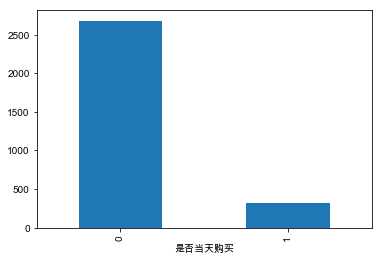

In [307]:
guke2.groupby('是否当天购买').size().plot.bar()

正常客户或无价值客户注册以后当天购物的比例

In [308]:
guke2.head()

_ = guke2.groupby('客户类别')['是否当天购买'].mean().rename(index={0: '无价值客户', 1: '正常客户'})
_ 

客户类别
无价值客户    0.183343
正常客户     0.007513
Name: 是否当天购买, dtype: float64

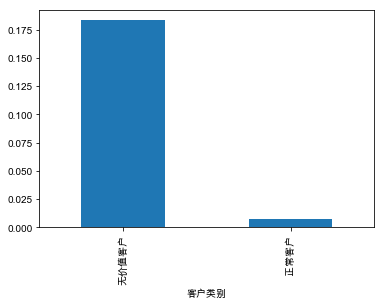

In [310]:
(_).plot.bar()

结论：

* 无价值客户注册当天购物的比例为18.3%
* 正常客户注册当天购物的比例为0.75%

由这个比例得到无价值客户更多的是因为有优惠所以才注册


---------------------------------------------------------------------

---

## 建模预测


### 正常和无价值客户区分主要受哪些因素影响？

哪些因素（特征）影响了客户类别区分？影响的方向（正面负面）和程度如何？
#### 推测
* 登陆次数？
* 经验值？
* 注册时间？
* 间隔天数？
* 。。。





In [145]:
guke2.head()

,登陆次数,注册时间(距1970-1-1的秒数),本次购买时间(距1970-1-1的秒数),经验值,订单数,客户类别,间隔天数,是否当天购买
客户ID,,,,,,,,
5245,55,1430413266,1495339734,206,1,1,751.463750,0
5254,69,1430413266,1499041945,428,13,1,794.313414,0
5286,57,1430413266,1509936376,280,1,1,920.406366,0
5292,184,1430413266,1510135868,643,5,1,922.715301,0
5474,71,1430413266,1481185064,61,2,1,587.636551,0


In [148]:
# 标签
y = guke2['客户类别'].values
y

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [149]:
# 特征，原始特征
x = guke2.drop(['注册时间(距1970-1-1的秒数)', '本次购买时间(距1970-1-1的秒数)', '客户类别'], axis=1).values
x

array([[ 55.        , 206.        ,   1.        , 751.46375   ,
          0.        ],
       [ 69.        , 428.        ,  13.        , 794.31341435,
          0.        ],
       [ 57.        , 280.        ,   1.        , 920.40636574,
          0.        ],
       ...,
       [ 12.        ,  62.        ,   1.        ,   4.04061343,
          0.        ],
       [ 14.        ,  68.        ,   2.        ,   1.50359954,
          0.        ],
       [ 16.        ,  27.        ,   1.        ,   3.20237269,
          0.        ]])

原始特征数据分布情况

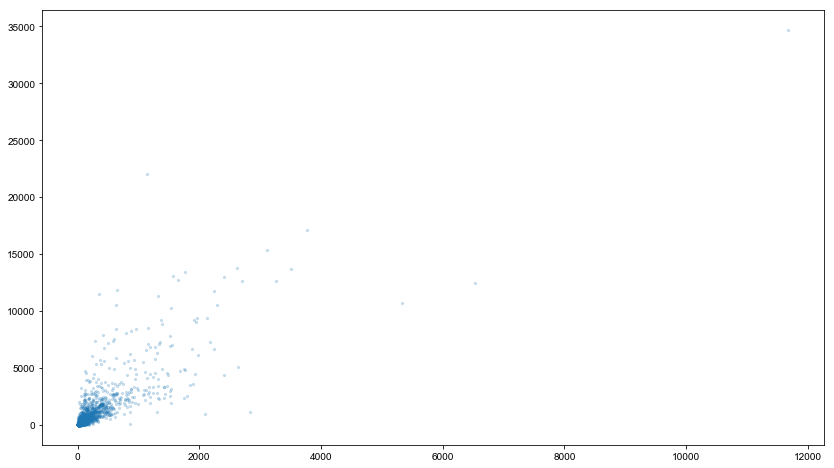

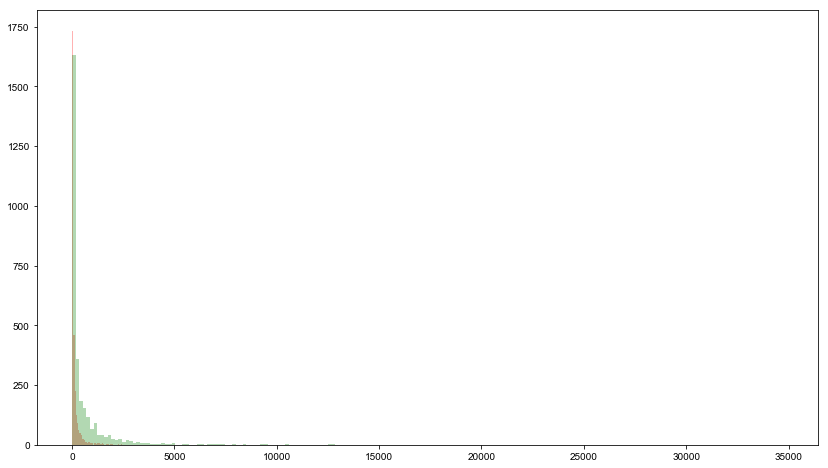

In [258]:
# 散点图
plt.figure(figsize=(14, 8))
plt.scatter(x[:,0], x[:, 1], s=5, alpha=0.2)
plt.show()

# 直方图
plt.figure(figsize=(14, 8))
plt.hist(x[:, 0], bins=200, color='r', alpha=0.3)
plt.hist(x[:, 1], bins=200, color='g', alpha=0.3)
# plt.xlim(0, 2000)
plt.show()

数据正规化，将特征量纲统一到统一范围

In [151]:
from sklearn import preprocessing
X = preprocessing.scale(x)
X

array([[-0.25149108, -0.2832591 , -0.32408248,  1.943843  , -0.34312494],
       [-0.21708681, -0.1484197 ,  0.19481848,  2.11193475, -0.34312494],
       [-0.24657618, -0.23831263, -0.32408248,  2.60657538, -0.34312494],
       ...,
       [-0.35716132, -0.37072249, -0.32408248, -0.98816749, -0.34312494],
       [-0.35224642, -0.36707818, -0.28084073, -0.99811975, -0.34312494],
       [-0.34733153, -0.39198095, -0.32408248, -0.99145576, -0.34312494]])

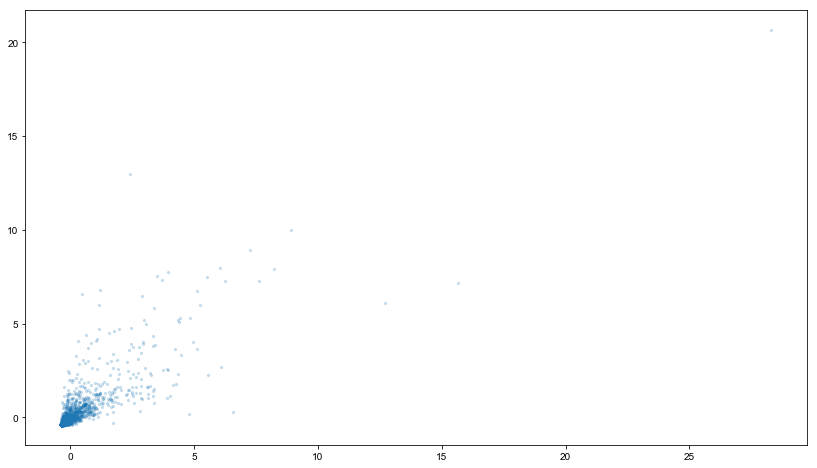

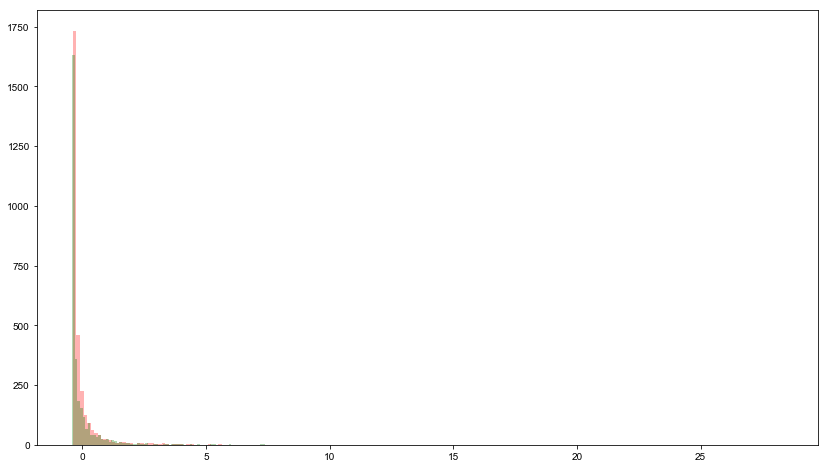

In [260]:
# 散点图
plt.figure(figsize=(14, 8))
plt.scatter(X[:,0], X[:, 1], s=5, alpha=0.2)
plt.show()

# 直方图
plt.figure(figsize=(14, 8))
plt.hist(X[:, 0], bins=200, color='r', alpha=0.3)
plt.hist(X[:, 1], bins=200, color='g', alpha=0.3)
# plt.xlim(-0.5, 1)
plt.show()

### 机器学习算法建模

* 线性回归：连续数据建模
* 逻辑回归：离散数据建模

In [154]:

from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.linear_model import LogisticRegression  # 逻辑回归

# clf = LinearRegression()
clf = LogisticRegression(solver='liblinear')

# 训练模型
clf.fit(X, y)

# 查看模型拟合程度
clf.score(X, y)

0.7573333333333333

In [155]:
# 模型误差
clf.intercept_  

array([-0.25807352])

In [156]:
# 特征影响
clf.coef_  

# 正负代表特征和结果是正相关还是负相关
# 绝对值大小代表相关程度，特征对结果的影响程度

array([[-0.39631061,  0.32051473,  0.47222769,  1.19829257, -0.61756718]])

In [157]:
guke2.drop(['注册时间(距1970-1-1的秒数)', '本次购买时间(距1970-1-1的秒数)', '客户类别'], axis=1).head()

,登陆次数,经验值,订单数,间隔天数,是否当天购买
客户ID,,,,,
5245,55,206,1,751.463750,0
5254,69,428,13,794.313414,0
5286,57,280,1,920.406366,0
5292,184,643,5,922.715301,0
5474,71,61,2,587.636551,0


将特征名称和特征系数组合为Series数据

In [158]:
impact = pd.Series(clf.coef_[0], index=['登陆次数', '经验值', '订单数', '间隔天数', '是否当天购买'])
impact

登陆次数     -0.396311
经验值       0.320515
订单数       0.472228
间隔天数      1.198293
是否当天购买   -0.617567
dtype: float64

按特征对标签的影响力排名

In [159]:
_ = impact.sort_values(ascending=False)
_

间隔天数      1.198293
订单数       0.472228
经验值       0.320515
登陆次数     -0.396311
是否当天购买   -0.617567
dtype: float64

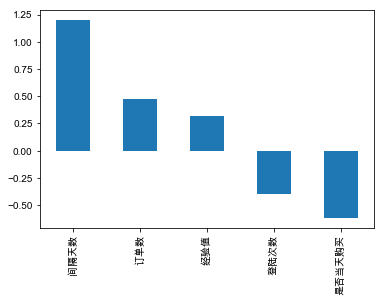

In [160]:
_.plot.bar()

按影响力绝对值排序（不管正面负面，只看影响大小）

In [161]:
_ = np.abs(_).sort_values(ascending=False)
_

间隔天数      1.198293
是否当天购买    0.617567
订单数       0.472228
登陆次数      0.396311
经验值       0.320515
dtype: float64

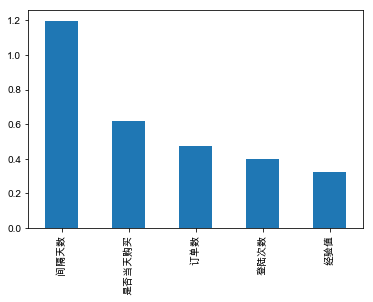

In [162]:
_.plot.bar()

### 模型解读

对用户是正常用户还是无价值用户的特征影响情况：

* 正面影响特征
    * 间隔天数      1.198293
    * 订单数       0.472228
    * 经验值       0.320515

* 负面影响特征
    * 是否当天购买   -0.617567
    * 登陆次数     -0.396311
    
    
间隔天数越大，订单数越多，经验值越大，（注册当天不购买，登录次数越少）越有可能是正常用户，反之亦然
    

### 研究总结
相对于正常客户，无价值客户：
* 登陆次数**更少**
* 会员经验**更少**
* 购买订单数**更少**
* 注册和购买间隔时间**更短**


### 相关建议

下订单“稳准狠”的无价值客户，不会在正价商品上过多停留，不会花时间去关注除优惠商品以外的其他商品。
为了节省优惠营销费用、提高盈利，给出以下建议：

* 差异化推广
    * 向正常客户推广优质商品
    * 向无价值客户推广高性价比商品
* 关联推广
    * 在优惠商品处增加原价商品广告，引导客户顺便购买
* 打包销售
    * 将优惠商品与原价商品打包组合销售